## Programming Assignment #5

**Visualization**

100 points possible.

This assignment asks you to create different visualizations.

##The Setting -- Visualize Your Own Adventure

Identify a data set (or data sets) that interests you and follow the instructions below to create specific types of visualizations. It is OK if this data set overlaps other assignments. Do not use examples from the book. You may use matplotlib or Seaborn.



# Part 0 -- Submission Details


(10 points) Please enter your name and the date below. Submit your answers as a completed notebook by the deadline posted on Canvas.  Late submissions will not get credit for this section.

Name: ***Matt Massey***

Date: ***11/15/2022***


# Part 1 -- Load Data Set

(5 points) Load a data set of your choosing into an appropriate data structure. Leave a comment describing what your data set is and why it interests you.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# url to current cumulative covid case and death counts for usa counties in 2022; maintained by new york times - https://github.com/nytimes/covid-19-data
nyt_data = r'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2022.csv'

# create new dataframe from data above; parse date column as datetime dtype
df_nyt = pd.read_csv(nyt_data, parse_dates=['date'])

# clean dataframe; include only kentucky records; drop unnecessary columns
df_nyt = df_nyt[df_nyt['state']=='Kentucky'].drop(['fips'], axis=1)


# create new column to rank dataframe by counties with highest case counts
# create new dataframe of maximum case and death counts; ordered by the highest values of case counts
ranked_cases = df_nyt.groupby('county').apply(lambda x: x.max()).sort_values('cases', ascending=False)

# create new column in df_nyt dataframe for categorical data; categories are counties ordered by case count
df_nyt['ranked_cases'] = pd.Categorical(df_nyt['county'], categories=ranked_cases.index, ordered=True)

# sort values of 2022 covid case/death counts from highest cases to lowest cases
df_nyt = df_nyt.sort_values(['ranked_cases','date']).reset_index(drop=True)


# view first 5 records of dataframe
df_nyt.head()

,date,county,state,cases,deaths,ranked_cases
0,2022-01-01,Jefferson,Kentucky,143268,1834.0,Jefferson
1,2022-01-02,Jefferson,Kentucky,144121,1834.0,Jefferson
2,2022-01-03,Jefferson,Kentucky,145614,1850.0,Jefferson
3,2022-01-04,Jefferson,Kentucky,147449,1851.0,Jefferson
4,2022-01-05,Jefferson,Kentucky,150221,1859.0,Jefferson


In [43]:
# Provisional count of deaths involving coronavirus disease 2019 (COVID-19) by county of occurrence, in the United States, 2020-2022; 
# for more info see: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-in-the-United-St/kn79-hsxy
death_data = r'https://data.cdc.gov/api/views/kn79-hsxy/rows.csv?accessType=DOWNLOAD'

# create new dataframe from data above; parse date columns as datetime dtype
df_death = pd.read_csv(death_data, parse_dates=['Date as of', 'Start Date', 'End Date'])

# clean dataframe; include only kentucky records; drop unnecessary columns
df_death = df_death[df_death['State']=='KY'].drop(['Urban Rural Code', 'Footnote'], axis=1)


# create new columns
# rate of covid deaths for all deaths
df_death['covid deaths per all deaths'] = df_death['Deaths involving COVID-19'] / df_death['Deaths from All Causes']

# binary indicator variable for covid deaths per all deaths greater than median; looks to be two different possible groups?
df_death['covid death median indicator'] = (df_death['covid deaths per all deaths'] >= df_death['covid deaths per all deaths'].median())*1


# sort values by covid deaths per all deaths; reset index of dataframe
df_death = df_death.sort_values(['covid deaths per all deaths'], ascending=False).reset_index(drop=True)


# view first 5 records of cleaned dataframe
df_death.head()


,Date as of,Start Date,End Date,State,County name,FIPS County Code,Deaths involving COVID-19,Deaths from All Causes,covid deaths per all deaths,covid death median indicator
0,2022-11-09,2020-01-01,2022-11-05,KY,Boyle County,21021,399.0,1835.0,0.217439,1
1,2022-11-09,2020-01-01,2022-11-05,KY,Whitley County,21235,318.0,1863.0,0.170692,1
2,2022-11-09,2020-01-01,2022-11-05,KY,Pike County,21195,698.0,4147.0,0.168314,1
3,2022-11-09,2020-01-01,2022-11-05,KY,Barren County,21009,316.0,1892.0,0.167019,1
4,2022-11-09,2020-01-01,2022-11-05,KY,Campbell County,21037,383.0,2369.0,0.161672,1


In [44]:
# This crosswalk weighs communities down to the census tract with COVID-19 data, considering disease morbidity and mortality, as well as social and economic contextual data. 
# for more info see: https://healthdata.gov/Health/COVID-19-Community-Vulnerability-Crosswalk-Crosswa/x2y5-9muu
comm_data = r'https://healthdata.gov/api/views/x2y5-9muu/rows.csv?accessType=DOWNLOAD'

# create new dataframe from data above
df_comm = pd.read_csv(comm_data)

# clean dataframe; include only kentucky records; drop unnecessary columns; reset index
df_comm = df_comm[df_comm['STATE']=='KENTUCKY'].drop(['ST_ABBR','FIPS', 'County FIPS', 'STCNTY', 'Tribal Community\n(1 if yes)', 'Tribal Community\nScore (Geographic Only)'], axis=1).reset_index(drop=True)

# view first 5 records of cleaned dataframe
df_comm.head()

,STATE,COUNTY,LOCATION,Total Score,Max Possible Score,Hardest Hit Area (HHA),HHA Score,Low Income Area (LIA) County SAIPE - (Poverty Percentage),Low Income Area (LIA) County SAIPE- Score,Low Income Area (LIA) Census Tract (Poverty Percentage),Low Income Area (LIA) Census Tract - Score,Rural,Rural - Score
0,KENTUCKY,Adair,"Census Tract 9701, Adair County, Kentucky",20,20,ModerateBurden,0,0.214,15,0.2085,15,1,5
1,KENTUCKY,Adair,"Census Tract 9702, Adair County, Kentucky",20,20,ModerateBurden,0,0.214,15,0.1319,7,1,5
2,KENTUCKY,Adair,"Census Tract 9703, Adair County, Kentucky",20,20,ModerateBurden,0,0.214,15,0.2459,15,1,5
3,KENTUCKY,Adair,"Census Tract 9704.01, Adair County, Kentucky",20,20,ModerateBurden,0,0.214,15,0.2140,15,1,5
4,KENTUCKY,Adair,"Census Tract 9704.02, Adair County, Kentucky",20,20,ModerateBurden,0,0.214,15,0.1813,7,1,5


# Part 2 -- Line Plot

(15 points) Create a line plot using your data.  Please give your visualization a title, appropripate X and Y axis labels, and a legend.

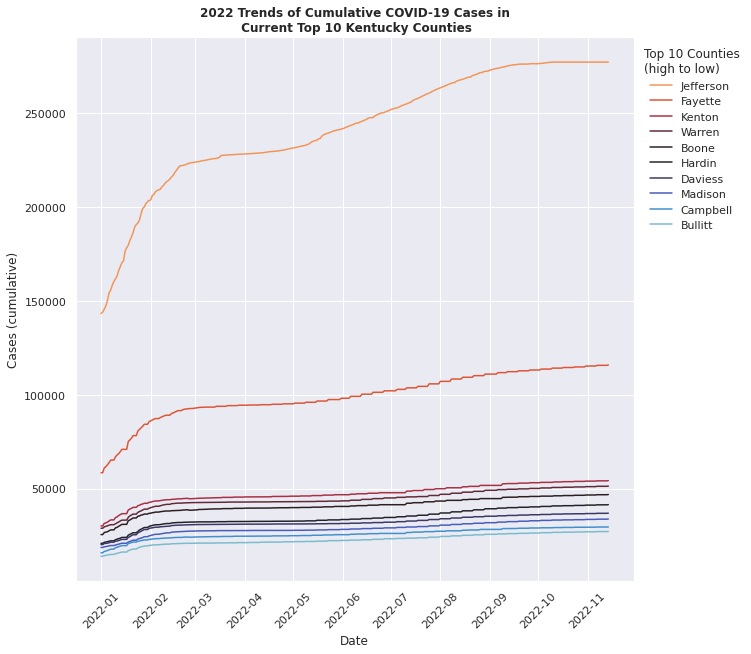

In [45]:
# set default seaborn theme for aesthetic plots
sns.set_theme()

# define figure size 10 by 10 inches
sns.set(rc={"figure.figsize":(10, 10)})


# create new seaborn lineplot object of top 10 cumulative case counts of ky counties with current highest case counts; date on x axis; cumulative case counts in 2022 on y axis
# color lines by county; use reversed icefire color palette
lp = sns.lineplot(data=df_nyt[df_nyt['ranked_cases'].isin(df_nyt['ranked_cases'].cat.categories[0:10])], x='date', y='cases', hue='county', palette='icefire_r')

plt.title('2022 Trends of Cumulative COVID-19 Cases in\n Current Top 10 Kentucky Counties', weight=900)   # plot title with bold font
plt.xlabel('Date')    # new label for x axis
plt.ylabel('Cases (cumulative)')    # new label for y axis
plt.xticks(rotation=45)   # rotate x ticks and labels by 45 degrees for readability

# move legend to left of plot; remove legend frame; create new legend title
sns.move_legend(lp, 'upper left', bbox_to_anchor=(1,1), frameon=False, title='Top 10 Counties\n(high to low)')


# show plot
plt.show()

# Part 3 -- Scatter Plot

(15 points) Create a scatter plot using your data. Please give your visualization a title, appropripate X and Y axis labels, and a legend.

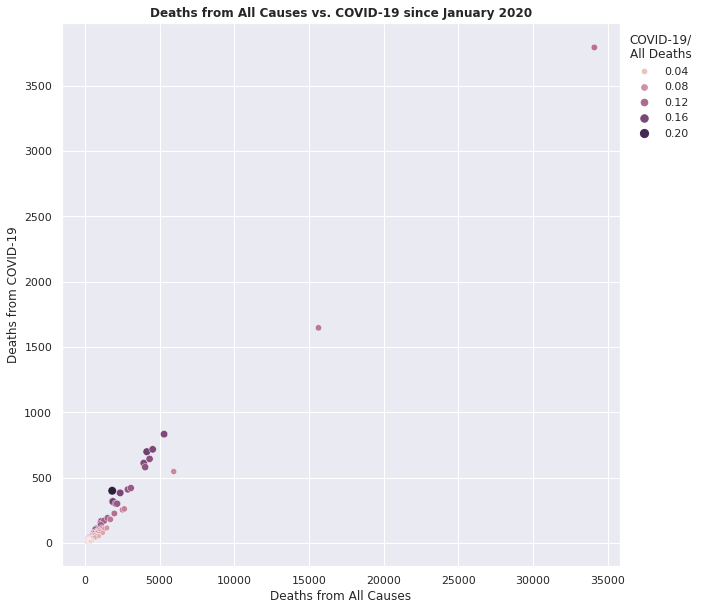

In [46]:
# create new seaborn scatterplot object; deaths from all causes on x axis; deaths from covid on y axis; color and size by covid per all deaths rate
sp = sns.scatterplot(data=df_death, x='Deaths from All Causes', y='Deaths involving COVID-19', hue='covid deaths per all deaths', size='covid deaths per all deaths')

plt.title('Deaths from All Causes vs. COVID-19 since January 2020', weight=900)   # new title for plot in bold font
plt.ylabel('Deaths from COVID-19')    # new y label
# move legend to left of figure; remove legend frame; create legend title
sns.move_legend(sp, 'upper left', bbox_to_anchor=(1,1), frameon=False, title='COVID-19/\nAll Deaths')

# show plot
plt.show()

# Part 4 -- Histogram

(15 points) Create a histogram using your data. Please give your visualization a title and appropripate X and Y axis labels.  Leave as a comment how you decided the appropriate number of bins used for creating your histogram.

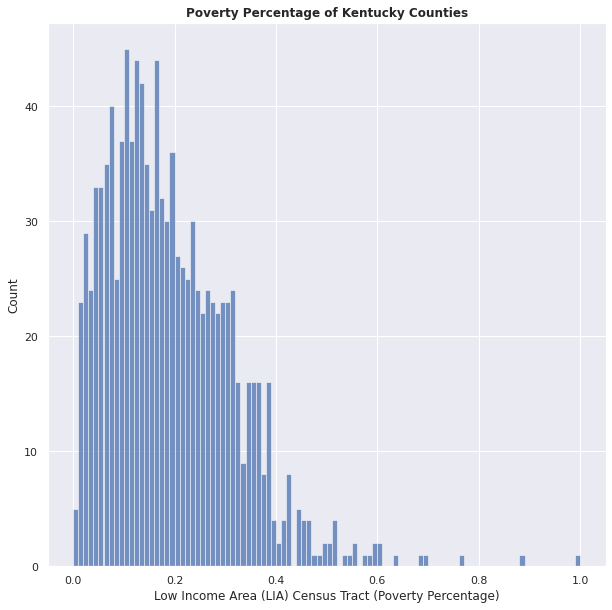

In [47]:
# new seaborn histogram plot of poverty percentage of kentucky census tracts
# bin width of 0.01 (1%) chosen to see what the distribution looks like; identify any possible multi-modal distributions
hp = sns.histplot(data=df_comm, x='Low Income Area (LIA) Census Tract (Poverty Percentage)', binwidth=0.01)

# new plot title in bold font
plt.title('Poverty Percentage of Kentucky Counties', weight=900)

# show plot
plt.show()

# Part 5 -- Other Visualization

(15 points) Create a visualization that interests you; please select something other than line plots, scatter plots, and histograms.  Use this space to get class credit for exploring something you find useful.  Please give your visualization appropriate titles, X and Y axis labels, and a legend (if applicable).

In [48]:
# import urlopen and json to read geojson of usa counties with fips codes
from urllib.request import urlopen
import json

# read geojson of all usa counties with fips codes; data originally from us census bureau, but hosted on plotly github
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response: counties = json.load(response)

# import plotly express to create geographic map plot / choroplet map
import plotly.express as px

# create new choropleth map object; using cumulative deaths dataframe; all usa counties in geojson; locations are linked together with fips in both datasets; 
# choropleth coloring by covid deaths per all deaths rate using standard Viridis color scale; color range normalized from 0 to maximum value of covid deaths per all deaths;
# scope is only usa; map is zoomed in automatically to extent of data in df_death dataframe (kentucky); hover cursor information includes county name and covid deaths per all deaths;
# title of map
fig = px.choropleth(df_death, geojson=counties, locations='FIPS County Code', color='covid deaths per all deaths',
                           color_continuous_scale="Viridis",
                           range_color=(0, df_death['covid deaths per all deaths'].max()),
                           scope='usa', fitbounds='locations',
                           hover_name='County name', 
                           title='Proportion of Cumulative COVID deaths per All deaths in Kentucky Counties')

# updating color bar scale with new title; custom height/length to 300 pixels; ticks at 5% intervals
fig.update_layout(coloraxis_colorbar=dict(
    title="COVID-19 per Total deaths",
    lenmode="pixels", len=300,
    ticks="outside", tickvals=[0,0.05,0.1,0.15,0.2], dtick=4))

# show figure
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Part 6 -- Subplots

(15 points) Create a plot containing at least two subplots.  You may reuse code from above or create new visualizations.

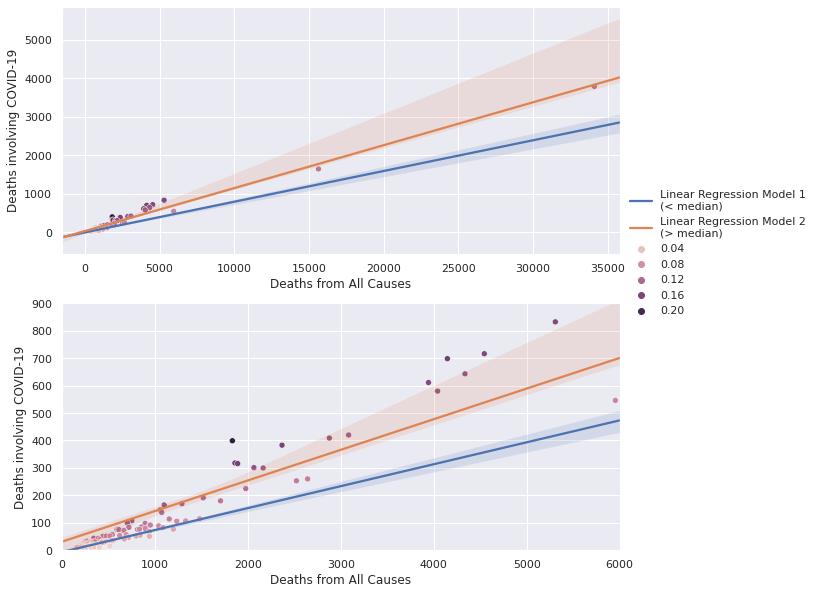

In [50]:
# create new figure and axes objects for subplot; 2 plots in each row; figure size 10x10 inches
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))

# new scatterplot object of covid deaths (y) vs all deaths (x); colored by covid deaths per all deaths; using ax1 subplot
sp1 = sns.scatterplot(data=df_death, x='Deaths from All Causes', y='Deaths involving COVID-19', hue='covid deaths per all deaths', ax=ax1)

# new scatterplot object of covid deaths (y) vs all deaths (x); colored by covid deaths per all deaths; using ax2 subplot
sp2 = sns.scatterplot(data=df_death, x='Deaths from All Causes', y='Deaths involving COVID-19', hue='covid deaths per all deaths', ax=ax2)
# set y limit to 900 and x limit to 6000 to show largest group of data points in second subplot ax2
ax2.set_ylim(0,900)
ax2.set_xlim(0,6000)

# create two linear regression models and show on each subplot
# regression 1 using points with covid death per all deaths BELOW median; don't repeat scatter plot; do not limit regression to data extent
# plot on subplot ax1
lr1_ax1 = sns.regplot(data=df_death[df_death['covid death median indicator'] == 0], x='Deaths from All Causes', y='Deaths involving COVID-19', scatter=False, truncate=False, ax=ax1, label='Linear Regression Model 1\n(< median)')
# plot on subplot ax2
lr1_ax2 = sns.regplot(data=df_death[df_death['covid death median indicator'] == 0], x='Deaths from All Causes', y='Deaths involving COVID-19', scatter=False, truncate=False, ax=ax2, label='Linear Regression Model 1\n(< median)')

# regression 2 using points with covid death per all deaths ABOVE median; don't repeat scatter plot; do not limit regression to data extent
# plot on subplot ax1
lr2_ax1 = sns.regplot(data=df_death[df_death['covid death median indicator'] == 1], x='Deaths from All Causes', y='Deaths involving COVID-19', scatter=False, truncate=False, ax=ax1, label='Linear Regression Model 2\n(> median)')
# plot on subplot ax2
lr2_ax2 = sns.regplot(data=df_death[df_death['covid death median indicator'] == 1], x='Deaths from All Causes', y='Deaths involving COVID-19', scatter=False, truncate=False, ax=ax2, label='Linear Regression Model 2\n(> median)')

# remove duplicate legend in first subplot
ax1.get_legend().remove()
# move lgened from second subplot to outside in middle between two subplots; no frame around legend
ax2.legend(loc='upper left', frameon=False, bbox_to_anchor=(1,1.5))

# show plot
plt.show()

# Part 7 -- Documentation and Correctness
(10 points) Please document your code with human-readable messages explaining what the code is doing; at a minimum, every function and control structure should be documented.  If your response is a 1-liner, explain how it works.

Additionally, please error check your code; partial credit will be given to answers that do not fully address the requirements. For example, if it says write a function, please make sure your code provides a function.

Please make sure your submission has everything completed.

**Data access for testing**:  Test data is likely needed to run, test, and grade your code. If your code uses publicly available URLs, you do not need to submit data.  If your data is not available online as a URL, please submit data with your Canvas submission.  If your test data is large (over the Canvas submission size), please only submit a sample. If your data is not distributable due to licensing or regulatory concerns, please submit artificial test data. Zip files are perfectly acceptable responses.